In [3]:
!pip install pandas numpy matplotlib scikit-learn tensorflow

### Loading Data Set

In [7]:
import pandas as pd

# Load the CSV into a DataFrame
df = pd.read_csv('PowerQualityDistributionDataset1.csv')

# Display first few rows
df.head()

,Unnamed: 0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,...,Col120,Col121,Col122,Col123,Col124,Col125,Col126,Col127,Col128,output
0,0,-797.962914,-1320.199586,-1828.741445,-2319.935857,-2789.218649,-3231.111864,-3641.962908,-4018.119193,-4355.929647,...,3632.834002,3221.982426,2780.090228,2311.720161,1821.438861,1311.983509,790.659456,262.031836,-269.335205,1
1,1,4387.885674,4567.747164,4693.741356,4776.824895,4824.300958,4850.777519,4862.646175,4867.211521,4866.298624,...,-165.252287,524.062959,1199.684611,1842.437384,2437.714882,2972.733259,3437.450839,3828.215741,4143.201102,2
2,2,-4050.074299,-4340.408587,-4576.875995,-4769.518913,-4918.338175,-5025.159834,-5100.026323,-5141.111052,-5153.892968,...,563.322919,-47.475988,-656.447463,-1252.637741,-1825.089177,-2364.673580,-2861.346591,-3309.630078,-3706.785897,2
3,3,3458.450134,3686.700705,4000.773209,4392.451258,4834.343975,5269.845213,5636.871457,5876.078192,5950.944421,...,-722.183210,67.562203,850.005032,1561.232918,2152.858410,2601.141643,2912.474970,3123.378574,3286.805684,3
4,4,-910.262100,-312.245917,298.552078,896.568469,1462.629392,1978.474763,2439.540162,2847.652177,3212.852886,...,-4506.574476,-4196.154858,-3881.168803,-3560.705563,-3225.633496,-2860.433401,-2452.321914,-1991.255895,-1474.497200,3


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# # Load data
# df = pd.read_csv('power_quality_data.csv')  # Replace with actual filename

# Normalize signal values between [0,1]
def normalize_signal(signal):
    return (signal - signal.min()) / (signal.max() - signal.min())

# Apply normalization
signals = df.iloc[:, :-1].apply(normalize_signal, axis=1)
labels = df.iloc[:, -1]  # Last column contains labels like 'sag', 'swell', etc.

# Segment into fixed-length windows (example: window_size = 200)
window_size = 200
X = []
for row in signals.values:
    segments = [row[i:i+window_size] for i in range(0, len(row), window_size)]
    X.extend(segments)

# Truncate extra segments
X = np.array([x for x in X if len(x)==window_size])
y = np.repeat(labels, len(X) // len(labels))[:len(X)]

# Encode labels
le = LabelEncoder()
y = le.fit_transform(y)

# # Split into train/test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train = X_train.reshape(-1, window_size, 1)
# X_test = X_test.reshape(-1, window_size, 1)

In [9]:
# Assume the last column is the label
X = df.iloc[:, :-1].values  # All rows, all columns except last
y = df.iloc[:, -1].values   # Last column

print("Signal shape:", X.shape)
print("Label shape:", y.shape)

Signal shape: (11998, 129)
Label shape: (11998,)


In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras import Input # Import the Input layer
import matplotlib.pyplot as plt

# Step 1: Manually read CSV and filter out invalid lines
file_path = 'PowerQualityDistributionDataset1.csv'

X = []
y = []

with open(file_path, 'r') as f:
    for line in f:
        line = line.strip()
        if not line or line == '-' or line.startswith('-') and len(line) < 5:
            continue  # Skip invalid lines

        try:
            values = list(map(float, line.split(',')))
            if len(values) > 1:
                X.append(values[:-1])   # All columns except last one are features
                y.append(values[-1])    # Last column is label
        except ValueError:
            continue  # Skip corrupted/malformed lines

# Check if any data was loaded
if len(X) == 0:
    raise ValueError("No valid data found in the file!")

X = np.array(X)
y = np.array(y)

print("Loaded X shape:", X.shape)
print("Loaded y shape:", y.shape)

Loaded X shape: (11998, 129)
Loaded y shape: (11998,)


In [11]:
# Step 2: Normalize signal values between [0,1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for LSTM input [samples, timesteps, features]
X_reshaped = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))
print(X_reshaped)

[[[0.00000000e+00]
  [3.67622533e-01]
  [3.34806191e-01]
  ...
  [5.59239705e-01]
  [5.16409806e-01]
  [4.80114997e-01]]

 [[8.33541719e-05]
  [6.68138702e-01]
  [6.75419602e-01]
  ...
  [7.45643123e-01]
  [7.67186881e-01]
  [7.89016462e-01]]

 [[1.66708344e-04]
  [1.79165034e-01]
  [1.60089310e-01]
  ...
  [3.02042854e-01]
  [2.65247513e-01]
  [2.39474811e-01]]

 ...

 [[9.99833292e-01]
  [4.10318731e-01]
  [3.72417303e-01]
  ...
  [6.23053067e-01]
  [5.77194436e-01]
  [5.35142698e-01]]

 [[9.99916646e-01]
  [4.41359629e-01]
  [4.03724848e-01]
  ...
  [6.59892570e-01]
  [6.13866239e-01]
  [5.73765269e-01]]

 [[1.00000000e+00]
  [6.53211822e-01]
  [6.23359401e-01]
  ...
  [8.73417511e-01]
  [8.44793136e-01]
  [8.16572322e-01]]]


In [12]:
# Step 3: Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# One-hot encode labels
y_one_hot = to_categorical(y_encoded)
print(y_one_hot)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [13]:
# Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_one_hot, test_size=0.2, stratify=y)


In [14]:
# Step 5: Build Model (LSTM Example)
model = Sequential([
    Input(shape=(X_train.shape[1], 1)), # Input layer
    LSTM(64),
    Dense(32, activation='relu'),
    Dense(len(le.classes_), activation='softmax')
])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,141 (74.77 KB)

 Trainable params: 19,141 (74.77 KB)

 Non-trainable params: 0 (0.00 B)

None


In [15]:
# Step 6: Compile the Model - metrics should be a list or tuple
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [16]:
# Step 7: Train the Model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_test, y_test))


Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 23s 66ms/step - accuracy: 0.2460 - loss: 1.5968 - val_accuracy: 0.2512 - val_loss: 1.5871
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 17s 56ms/step - accuracy: 0.2521 - loss: 1.5891 - val_accuracy: 0.2612 - val_loss: 1.5831
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 17s 58ms/step - accuracy: 0.2537 - loss: 1.5779 - val_accuracy: 0.2500 - val_loss: 1.5952
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.2573 - loss: 1.5927 - val_accuracy: 0.2492 - val_loss: 1.5890
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - accuracy: 0.2518 - loss: 1.5888 - val_accuracy: 0.2671 - val_loss: 1.5885
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 17s 57ms/step - accuracy: 0.2528 - loss: 1.5863 - val_accuracy: 0.2550 - val_loss: 1.5870
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - accuracy: 0.2629 - loss: 1.5778 - val_accuracy: 0.3404 - val_loss: 1.4316
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - accuracy: 0.2760 - loss: 1.5706 - 

In [17]:
# Step 8: Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4236 - loss: 1.1538
Test Accuracy: 0.4233


In [18]:
# Print first few samples to inspect
print("First sample X:\n", X[0])
print("First label y:", y[0])

First sample X:
 [    0.         -797.9629139 -1320.199586  -1828.741445  -2319.935857
 -2789.218649  -3231.111864  -3641.962908  -4018.119193  -4355.929647
 -4650.829055  -4904.643864  -5107.330184  -5261.626825  -5366.622879
 -5418.663525  -5419.576973  -5367.535249  -5264.365732  -5110.069166
 -4906.470001  -4656.307539  -4364.146538  -4024.510575  -3650.179436
 -3239.328934  -2797.436518  -2329.066729  -1837.871278  -1329.329968
  -808.0057599  -278.4650931   252.902023    782.4429348  1303.766529
  1812.308746   2303.502822   2772.785644   3215.592255   3626.44257
  4002.599102   4340.41002    4635.308742   4889.123311   5091.809843
  5246.107233   5351.102372   5403.143747   5403.14343    5352.015807
  5247.933438   5093.636409   4890.036346   4639.874603   4346.800838
  4008.076722   3632.833202   3221.982389   2781.003042   2311.720283
  1821.438316   1311.983904    791.5732227   262.0314643  -269.3344734
  -798.8763165 -1320.199418  -1828.74136   -2319.936416  -2789.219467
 -3

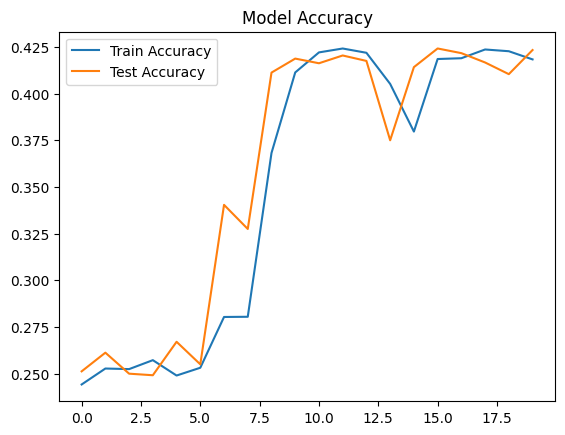

In [19]:
#  Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

In [20]:
!pip install paho-mqtt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 2.7 MB/s eta 0:00:00


In [28]:
import paho.mqtt.client as mqtt
import json
import time

# MQTT Setup - ThingsBoard demo server
THINGSBOARD_HOST = "demo.thingsboard.io"
ACCESS_TOKEN = "8jNZ4Z2eBShkbTmtX1KJ"  # Replace with your actual token

# Create MQTT client
client = mqtt.Client(client_id="")  # No fixed ID needed
client.username_pw_set(ACCESS_TOKEN)

try:
    client.connect(THINGSBOARD_HOST, 1883, 60)
except Exception as e:
    print(f"[ERROR] Could not connect to ThingsBoard: {e}")
    exit()

topic = "v1/devices/me/telemetry"

print("\nPublishing sample predictions to ThingsBoard...\n")

# Get predicted classes
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

for i in range(5):  # Send first 5 predictions
    true_label = le.inverse_transform([y_true_classes[i]])[0]
    pred_label = le.inverse_transform([y_pred_classes[i]])[0]

    payload = {
        "timestamp": int(time.time() * 1000),
        "true_label": true_label,
        "predicted_label": pred_label
    }

    print(f"[{i}] Sending: {payload}")
    client.publish(topic, json.dumps(payload))
    time.sleep(2)  # Delay between messages

confidence = np.max(y_pred[i])
payload = {
    "timestamp": int(time.time() * 1000),
    "true_label": true_label,
    "predicted_label": pred_label,
    "confidence": float(confidence)
}

print("\n✅ Predictions sent to ThingsBoard")
client.disconnect()


Publishing sample predictions to ThingsBoard...

 4/75 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step

<ipython-input-28-64a571e35819>:10: DeprecationWarning: Callback API version 1 is deprecated, update to latest version
  client = mqtt.Client(client_id="")  # No fixed ID needed


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
[0] Sending: {'timestamp': 1747290663688, 'true_label': np.float64(2.0), 'predicted_label': np.float64(3.0)}
[1] Sending: {'timestamp': 1747290665689, 'true_label': np.float64(5.0), 'predicted_label': np.float64(5.0)}
[2] Sending: {'timestamp': 1747290667691, 'true_label': np.float64(2.0), 'predicted_label': np.float64(3.0)}
[3] Sending: {'timestamp': 1747290669692, 'true_label': np.float64(1.0), 'predicted_label': np.float64(5.0)}
[4] Sending: {'timestamp': 1747290671694, 'true_label': np.float64(2.0), 'predicted_label': np.float64(3.0)}

✅ Predictions sent to ThingsBoard


<MQTTErrorCode.MQTT_ERR_SUCCESS: 0>

In [29]:
# import random
# while True:
#     i = random.randint(0, len(X_test)-1)
#     true_label = le.inverse_transform([y_true_classes[i]])[0]
#     pred_label = le.inverse_transform([y_pred_classes[i]])[0]
#     payload = {"true": true_label, "predicted": pred_label}
#     client.publish(topic, json.dumps(payload))
#     print(f"Published: {payload}")
#     time.sleep(5)

Published: {'true': np.float64(2.0), 'predicted': np.float64(3.0)}
Published: {'true': np.float64(4.0), 'predicted': np.float64(4.0)}
Published: {'true': np.float64(1.0), 'predicted': np.float64(3.0)}
Published: {'true': np.float64(3.0), 'predicted': np.float64(5.0)}
Published: {'true': np.float64(2.0), 'predicted': np.float64(3.0)}
Published: {'true': np.float64(4.0), 'predicted': np.float64(4.0)}
Published: {'true': np.float64(3.0), 'predicted': np.float64(3.0)}
Published: {'true': np.float64(4.0), 'predicted': np.float64(4.0)}
Published: {'true': np.float64(2.0), 'predicted': np.float64(3.0)}
Published: {'true': np.float64(3.0), 'predicted': np.float64(5.0)}
Published: {'true': np.float64(4.0), 'predicted': np.float64(4.0)}
Published: {'true': np.float64(1.0), 'predicted': np.float64(5.0)}
Published: {'true': np.float64(2.0), 'predicted': np.float64(5.0)}


KeyboardInterrupt: 

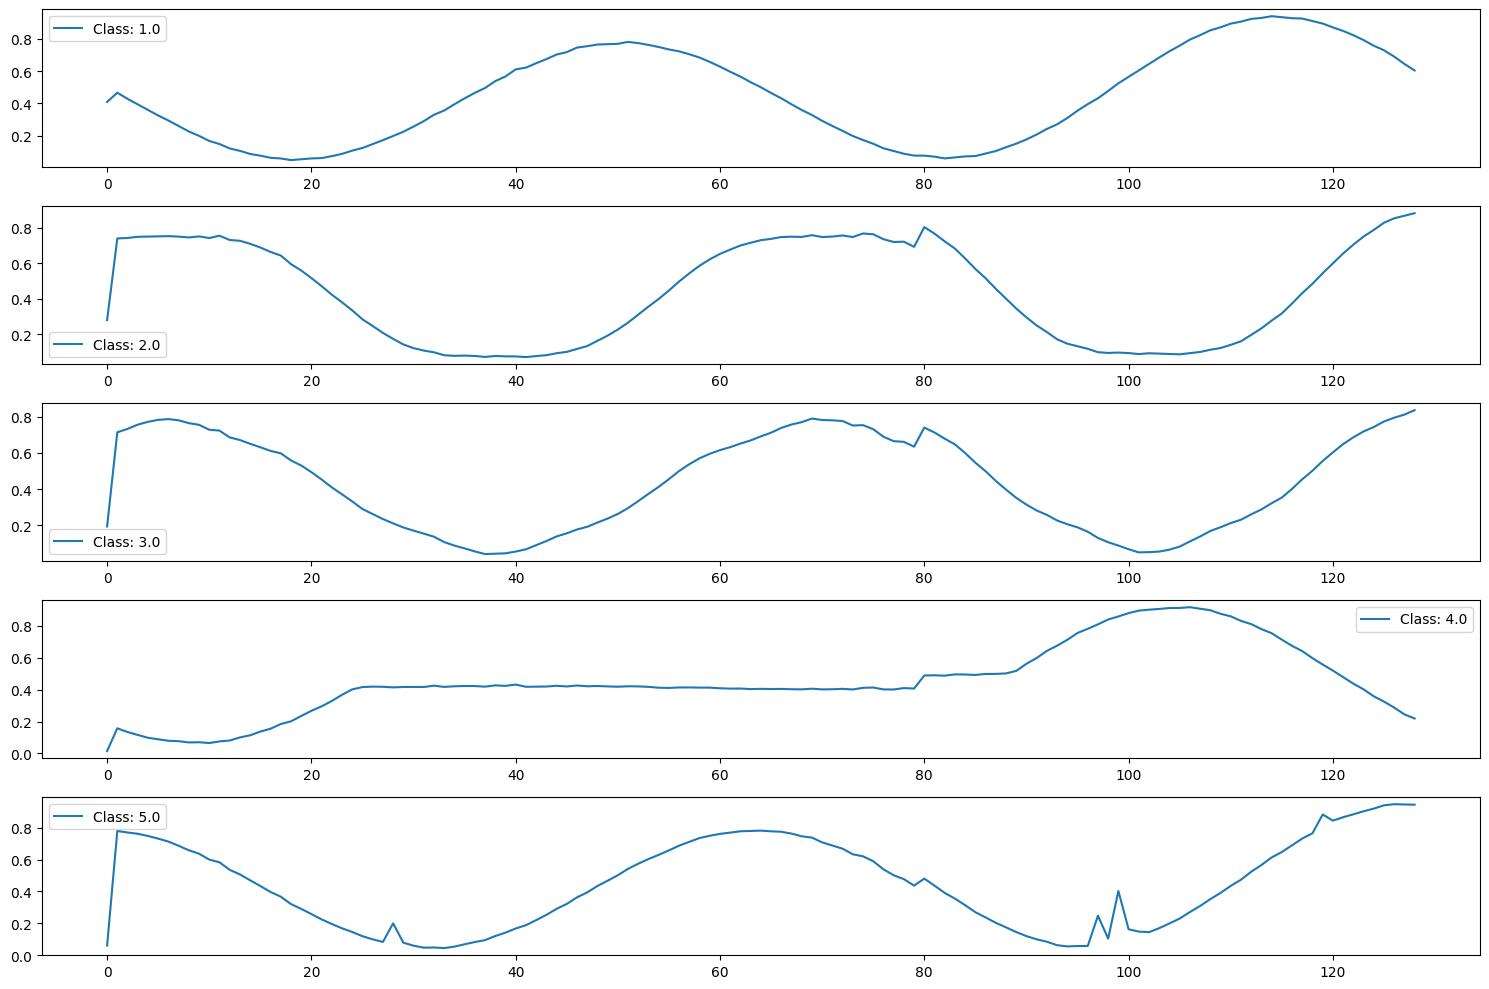

In [30]:
import matplotlib.pyplot as plt

# Example: Plot a sample signal from each class
unique_classes = np.unique(y_true_classes)
plt.figure(figsize=(15, 10))
for i, cls in enumerate(unique_classes):
    idx = np.where(y_true_classes == cls)[0][0]
    plt.subplot(len(unique_classes), 1, i+1)
    plt.plot(X_test[idx].flatten(), label=f"Class: {le.inverse_transform([cls])[0]}")
    plt.legend()
    plt.tight_layout()
plt.show()

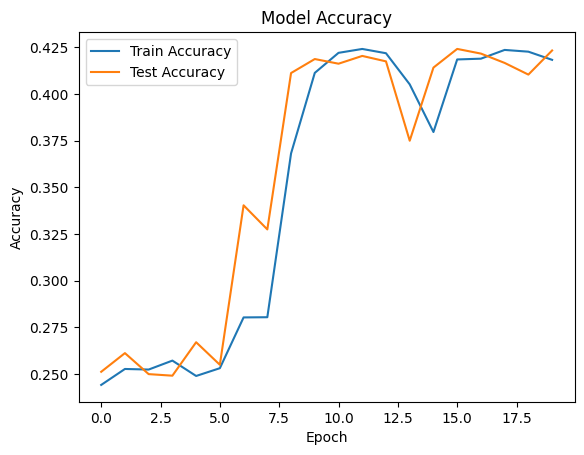

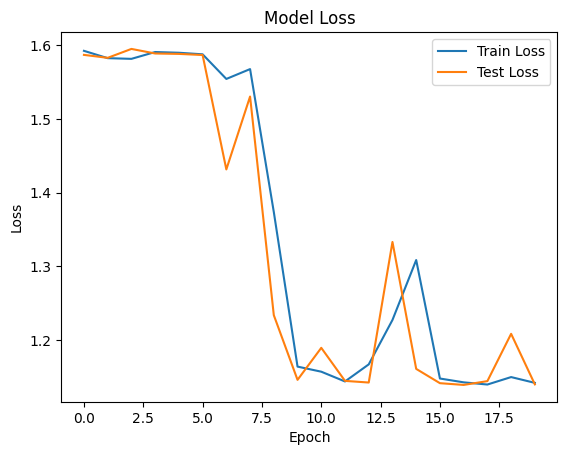

In [31]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

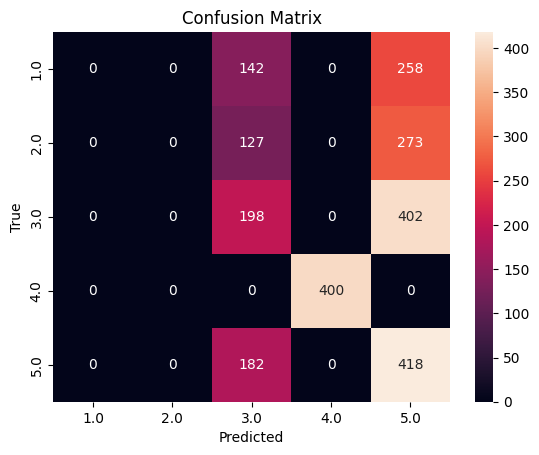

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [34]:
# from sklearn.metrics import classification_report

# target_names_str = le.inverse_transform(np.unique(y_encoded))

# print(classification_report(y_true_classes, y_pred_classes, target_names=target_names_str))

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TypeError: object of type 'numpy.float64' has no len()

In [35]:
import pandas as pd

results_df = pd.DataFrame({
    "True Label": le.inverse_transform(y_true_classes),
    "Predicted Label": le.inverse_transform(y_pred_classes)
})
print(results_df.head(10))

   True Label  Predicted Label
0         2.0              3.0
1         5.0              5.0
2         2.0              3.0
3         1.0              5.0
4         2.0              3.0
5         4.0              4.0
6         4.0              4.0
7         3.0              3.0
8         5.0              5.0
9         2.0              5.0


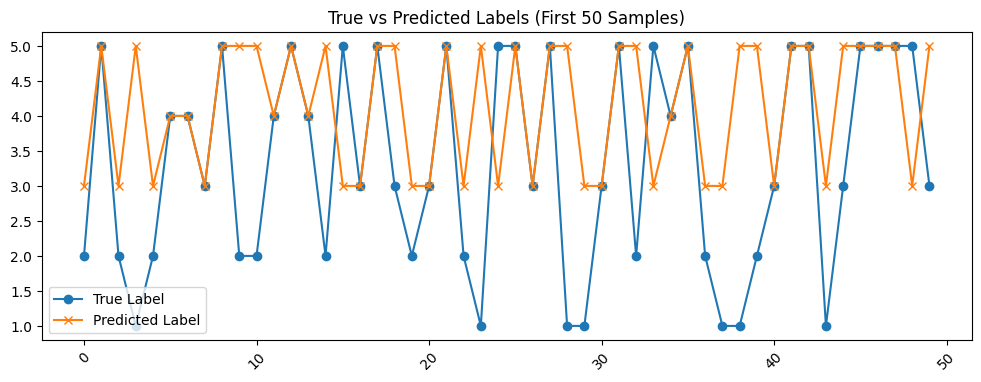

In [36]:
plt.figure(figsize=(12, 4))
plt.plot(results_df["True Label"].head(50), label="True Label", marker='o')
plt.plot(results_df["Predicted Label"].head(50), label="Predicted Label", marker='x')
plt.xticks(rotation=45)
plt.title("True vs Predicted Labels (First 50 Samples)")
plt.legend()
plt.show()

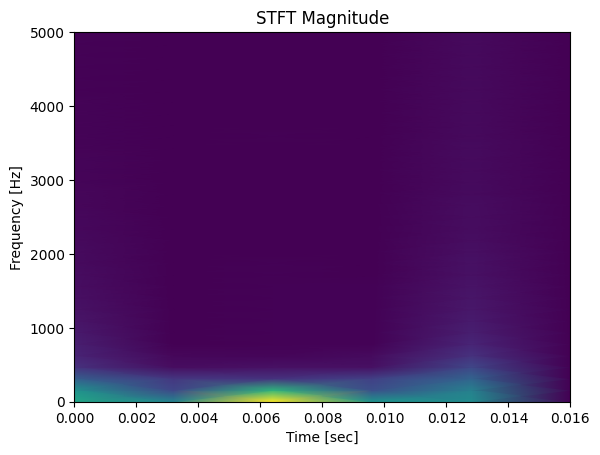

In [37]:
from scipy.signal import stft
import numpy as np

# Take one signal
signal = X_test[0].flatten()

# Compute STFT
f, t, Zxx = stft(signal, fs=10000, nperseg=64)
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()